# Fake or Real News

In [1]:
import os
import itertools


import pandas as pd
import numpy as np
from sklearn.model_selection import*
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Import and process Data

In [2]:
# Import `fake_or_real_news.csv` 
#df = pd.read_csv('data/fake_or_real_news.csv')  
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")  
df.shape
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
# Set `y` 
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.2, random_state=42)

In [6]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [7]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [8]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['שתי', 'תאמצנה', 'תוצאה', 'תחל', 'תיירות', 'תנותק', 'תעודת', 'תתרכז', 'القادمون', 'عربي']
['00', '000', '0000', '000000031', '00000031', '0001', '0002', '000billion', '000ft', '000km']


In [9]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [10]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [11]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [12]:
print(count_df.equals(tfidf_df))

False


In [13]:
count_df.head()

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
tfidf_df.head()

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize Data

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Build Models and Copmare and Predictions

In [16]:
clf = MultinomialNB() 

accuracy:   0.845
Confusion matrix, without normalization


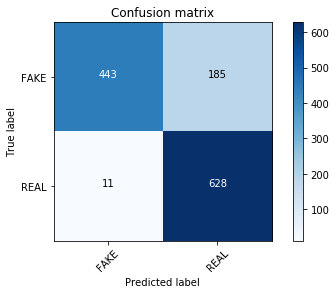

In [17]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [18]:
clf = MultinomialNB() 

accuracy:   0.899
Confusion matrix, without normalization


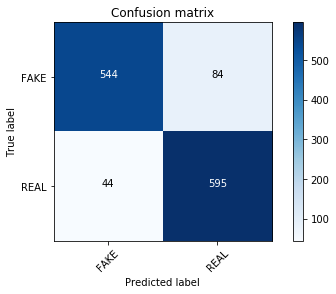

In [19]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.938
Confusion matrix, without normalization


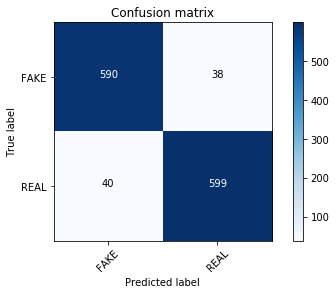

In [21]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [22]:
clf = MultinomialNB(alpha=0.1)

In [23]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.90134
Alpha: 0.10 Score: 0.90687
Alpha: 0.20 Score: 0.89661
Alpha: 0.30 Score: 0.89029
Alpha: 0.40 Score: 0.88240
Alpha: 0.50 Score: 0.87687
Alpha: 0.60 Score: 0.87293
Alpha: 0.70 Score: 0.86977
Alpha: 0.80 Score: 0.86267
Alpha: 0.90 Score: 0.85478


In [24]:
def binary_classification(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.218431254021684 2016
FAKE -4.743409725757571 october
FAKE -3.527038391528355 article
FAKE -3.4496384152499133 hillary
FAKE -3.1929561500257613 november
FAKE -3.1377096193594816 share
FAKE -2.646242871155122 source
FAKE -2.5256201847979494 email
FAKE -2.4726049525922087 snip
FAKE -2.3676617247854215 podesta
FAKE -2.3647814504477447 advertisement
FAKE -2.363865744850388 election
FAKE -2.3255559671270865 mosul
FAKE -2.325192566683108 print
FAKE -2.037692053743047 oct
FAKE -1.9638684458167968 corporate
FAKE -1.9605291238946414 establishment
FAKE -1.9487831339622559 28
FAKE -1.868352289757845 demand
FAKE -1.833125871351537 photo
FAKE -1.807271273394286 wikileaks
FAKE -1.7282280014018976 soros
FAKE -1.72794572738374 ayotte
FAKE -1.7157408209990612 pay
FAKE -1.714332817453045 pipeline
FAKE -1.7052196395424195 florida
FAKE -1.6989568566244473 brexit
FAKE -1.697717731011885 jewish
FAKE -1.6932644782408668 war
FAKE -1.689590241248403 healthcare

REAL 4.910216854363592 said
REAL 3.0810148

In [25]:
feature_names = tfidf_vectorizer.get_feature_names()

In [26]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.181918821889214, 'trump'),
 (-6.437878772963299, 'said'),
 (-6.619138557300004, 'clinton'),
 (-6.968886050915339, 'obama'),
 (-7.16760708567047, 'president'),
 (-7.177341156601496, 'sanders'),
 (-7.191489975207433, 'campaign'),
 (-7.244678878922972, 'republican'),
 (-7.2605681387885355, 'state'),
 (-7.262481561197119, 'cruz'),
 (-7.370195769071486, 'party'),
 (-7.382551525985805, 'new'),
 (-7.395255753999944, 'people'),
 (-7.47552969189713, 'percent'),
 (-7.4852003281228505, 'house'),
 (-7.526926861170745, 'republicans'),
 (-7.544381996017325, 'bush'),
 (-7.553978156416825, 'voters'),
 (-7.602477647496815, 'rubio'),
 (-7.6075242053897565, 'states')]

In [27]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.46400519401839, '0001'),
 (-11.46400519401839, '0002'),
 (-11.46400519401839, '000billion'),
 (-11.46400519401839, '000km'),
 (-11.46400519401839, '004s'),
 (-11.46400519401839, '00684'),
 (-11.46400519401839, '006s'),
 (-11.46400519401839, '007'),
 (-11.46400519401839, '007s'),
 (-11.46400519401839, '008s'),
 (-11.46400519401839, '009'),
 (-11.46400519401839, '0099'),
 (-11.46400519401839, '00am'),
 (-11.46400519401839, '00p'),
 (-11.46400519401839, '013c2812c9'),
 (-11.46400519401839, '014'),
 (-11.46400519401839, '01am'),
 (-11.46400519401839, '020'),
 (-11.46400519401839, '023'),
 (-11.46400519401839, '02714')]

In [28]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [29]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [30]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.908
Confusion matrix, without normalization


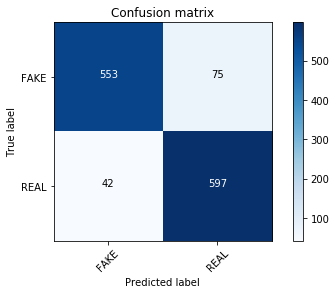

In [31]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [32]:
clf = PassiveAggressiveClassifier(n_iter=50)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.928
Confusion matrix, without normalization


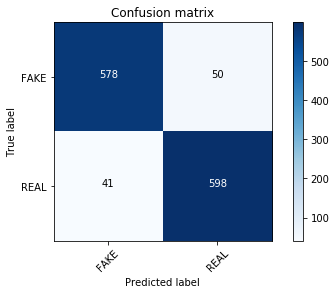

In [33]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])